In [1]:
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


8


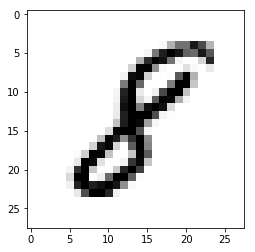

In [4]:
import matplotlib.pyplot as plt
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [8]:
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 102s 2ms/step - loss: 0.2025 - acc: 0.9382
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0794 - acc: 0.9755
Epoch 3/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.0539 - acc: 0.9826
Epoch 4/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0435 - acc: 0.9858
Epoch 5/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0343 - acc: 0.9889
Epoch 6/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0282 - acc: 0.9909
Epoch 7/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0243 - acc: 0.9920
Epoch 8/10
60000/60000 [==============================] - 101s 2ms/step - loss: 0.0222 - acc: 0.9921
Epoch 9/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0186 - acc: 0.9936
Epoch 10/10
60000/60000 [=====================

In [10]:
# Evaluate the model
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 7s 735us/step


[0.0672335379800681, 0.985]

9


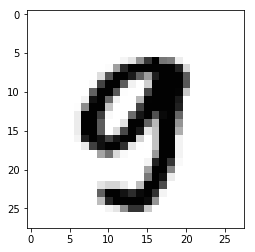

In [13]:
image_index = 4321
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [14]:
pred

array([[4.2286345e-11, 2.4257926e-14, 4.9680243e-17, 1.7452639e-07,
        2.1837942e-13, 9.7904671e-09, 1.0998129e-19, 1.9420606e-11,
        5.5583907e-08, 9.9999976e-01]], dtype=float32)